In [23]:
import numpy as np
import pandas as pd
import math
import datetime
from sklearn.utils import shuffle

### Defining custom functions

In [25]:
def load_dataset(path):
    df = pd.read_csv(path, sep=',')
    df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date().strftime("%B %d, %Y"))
    return df

In [26]:
def add_previous_npis(npis_prev, npis_curr):
    for prev, curr in zip(npis_prev, npis_curr):
        df[prev] = df.groupby('CountryName')[curr].shift()

    df.dropna(subset=npis_prev, inplace=True)

In [27]:
def prepare_samples_and_labels():
    #prepare samples
    samples = df[npis_prev]
    samples.insert(0, 'StringencyIndex_Average', df['StringencyIndex_Average'].div(100))
    samples = samples.to_numpy()

    #prepare labels
    labels = []
    for npi in npis:
        labels.append(df[npi].to_numpy())

    return samples, labels

In [28]:
def split_to_train_and_test(samples, labels, ratio=0.85):
    split_index = math.floor(ratio * len(samples))

    train_samples = samples[:split_index]
    train_labels = []

    for label in labels:
        train_labels.append(label[:split_index])

    test_samples = samples[split_index:]
    test_labels = []

    for label in labels:
        test_labels.append(label[split_index:])

    return train_samples, train_labels, test_samples, test_labels

### Preprocess data

In [29]:
npis = [
    "C1M",
    "C2M",
    "C3M",
    "C4M",
    "C5M",
    "C6M",
    "C7M",
    "C8M",
    "H1"
]

npis_prev = [
    "C1M_prev",
    "C2M_prev",
    "C3M_prev",
    "C4M_prev",
    "C5M_prev",
    "C6M_prev",
    "C7M_prev",
    "C8M_prev",
    "H1_prev"
]

npi_labels = [
    "School closing",
    "Workplace closing",
    "Cancel public events",
    "Restrictions on gatherings",
    "Close public transport",
    "Stay at home requirements",
    "Restrictions on internal movement",
    "International travel controls",
    "Public information campaigns"
]

In [30]:
df = load_dataset("./OxCGRT_data/OxCGRT_clean.csv")

In [31]:
df.head(10)

,Continent,CountryName,Date,C1M,C1M_Flag,C2M,C2M_Flag,C3M,C3M_Flag,C4M,...,C8M,H1,H1_Flag,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,Prev_StringencyIndex_Average,Daily_StringencyIndex_Change
0,0,Aruba,"March 16, 2020",3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,NV,0.0,11.11,0.00,0.000000
1,0,Aruba,"March 17, 2020",3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,3.0,0.0,NV,0.0,22.22,11.11,0.111111
2,0,Aruba,"March 18, 2020",3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,0.0,NV,0.0,33.33,22.22,0.111111
3,0,Aruba,"March 21, 2020",3.0,1.0,2.0,1.0,0.0,0.0,0.0,...,4.0,2.0,1.0,5.0,0.0,NV,0.0,44.44,33.33,0.111111
4,0,Aruba,"March 29, 2020",3.0,1.0,3.0,1.0,2.0,1.0,4.0,...,4.0,2.0,1.0,50.0,0.0,NV,0.0,85.19,44.44,0.518519
5,0,Aruba,"April 10, 2020",3.0,1.0,3.0,1.0,2.0,1.0,4.0,...,4.0,2.0,1.0,86.0,0.0,NV,0.0,88.89,85.19,0.111111
6,0,Aruba,"May 04, 2020",3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,4.0,2.0,1.0,100.0,2.0,NV,0.0,81.48,85.19,0.148148
7,0,Aruba,"May 18, 2020",2.0,1.0,2.0,1.0,2.0,1.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,66.67,81.48,0.074074
8,0,Aruba,"May 28, 2020",2.0,1.0,2.0,1.0,2.0,1.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,62.96,66.67,0.037037
9,0,Aruba,"May 31, 2020",2.0,1.0,2.0,1.0,2.0,1.0,0.0,...,4.0,2.0,1.0,101.0,3.0,NV,0.0,57.41,62.96,0.055556


In [32]:
df = df[["CountryName", "Date", "StringencyIndex_Average"] + npis][df["Continent"] == "Europe"]

In [33]:
add_previous_npis(npis_prev, npis)

In [34]:
samples, labels = prepare_samples_and_labels()

In [35]:
samples

array([[0.0833, 0.    , 0.    , ..., 0.    , 0.    , 1.    ],
       [0.3611, 0.    , 0.    , ..., 0.    , 1.    , 1.    ],
       [0.4167, 3.    , 0.    , ..., 0.    , 1.    , 1.    ],
       ...,
       [0.3807, 1.    , 2.    , ..., 2.    , 1.    , 0.    ],
       [0.1005, 1.    , 2.    , ..., 2.    , 1.    , 1.    ],
       [0.0833, 0.    , 0.    , ..., 0.    , 1.    , 1.    ]])

In [36]:
labels

[array([0., 3., 3., ..., 1., 0., 0.]),
 array([0., 0., 0., ..., 2., 0., 0.]),
 array([0., 2., 2., ..., 2., 0., 0.]),
 array([0., 2., 2., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 2., 0., 0.]),
 array([0., 0., 0., ..., 1., 0., 0.]),
 array([0., 0., 0., ..., 2., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 2., ..., 1., 1., 1.])]

In [37]:
samples, *labels = shuffle(samples, *labels, random_state=0)

In [38]:
train_samples, train_labels, test_samples, test_labels = split_to_train_and_test(samples, labels)

In [39]:
train_samples

array([[0.4312, 3.    , 0.    , ..., 0.    , 1.    , 2.    ],
       [0.4676, 1.    , 1.    , ..., 0.    , 3.    , 2.    ],
       [0.4232, 1.    , 2.    , ..., 0.    , 1.    , 2.    ],
       ...,
       [0.2963, 1.    , 0.    , ..., 0.    , 2.    , 2.    ],
       [0.6409, 1.    , 1.    , ..., 0.    , 3.    , 2.    ],
       [0.7037, 3.    , 2.    , ..., 1.    , 3.    , 2.    ]])

In [40]:
train_labels

[array([3., 1., 1., ..., 1., 1., 3.]),
 array([0., 2., 2., ..., 1., 1., 2.]),
 array([0., 2., 2., ..., 1., 1., 2.]),
 array([2., 4., 3., ..., 0., 4., 4.]),
 array([1., 0., 0., ..., 0., 2., 1.]),
 array([0., 0., 0., ..., 0., 2., 1.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([1., 3., 1., ..., 2., 3., 2.]),
 array([2., 2., 2., ..., 2., 2., 2.])]

## MTL model

In [41]:
from keras.optimizers import Adam
from keras import Input, Model
from keras.layers import Dense

num_tasks = 9
num_features = num_tasks + 1

shared_layer_1 = Dense(32, input_dim=num_features, activation='relu')
shared_layer_2 = Dense(32, activation='relu')

task_1_output_layer = Dense(5, activation='softmax', name='C1')
task_2_output_layer = Dense(5, activation='softmax', name='C2')
task_3_output_layer = Dense(5, activation='softmax', name='C3')
task_4_output_layer = Dense(5, activation='softmax', name='C4')
task_5_output_layer = Dense(5, activation='softmax', name='C5')
task_6_output_layer = Dense(5, activation='softmax', name='C6')
task_7_output_layer = Dense(5, activation='softmax', name='C7')
task_8_output_layer = Dense(5, activation='softmax', name='C8')
task_9_output_layer = Dense(5, activation='softmax', name='H1')

input_tensor = Input(shape=(num_features,))

shared_tensor = shared_layer_1(input_tensor)
shared_tensor = shared_layer_2(shared_tensor)

task_1_output = task_1_output_layer(shared_tensor)
task_2_output = task_2_output_layer(shared_tensor)
task_3_output = task_3_output_layer(shared_tensor)
task_4_output = task_4_output_layer(shared_tensor)
task_5_output = task_5_output_layer(shared_tensor)
task_6_output = task_6_output_layer(shared_tensor)
task_7_output = task_7_output_layer(shared_tensor)
task_8_output = task_8_output_layer(shared_tensor)
task_9_output = task_9_output_layer(shared_tensor)

In [42]:
mtl_model = Model(inputs=input_tensor, outputs=[
    task_1_output,
    task_2_output,
    task_3_output,
    task_4_output,
    task_5_output,
    task_6_output,
    task_7_output,
    task_8_output,
    task_9_output], )

mtl_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'C1': 'sparse_categorical_crossentropy',
        'C2': 'sparse_categorical_crossentropy',
        'C3': 'sparse_categorical_crossentropy',
        'C4': 'sparse_categorical_crossentropy',
        'C5': 'sparse_categorical_crossentropy',
        'C6': 'sparse_categorical_crossentropy',
        'C7': 'sparse_categorical_crossentropy',
        'C8': 'sparse_categorical_crossentropy',
        'H1': 'sparse_categorical_crossentropy'
    },
    metrics={
        'C1': 'accuracy',
        'C2': 'accuracy',
        'C3': 'accuracy',
        'C4': 'accuracy',
        'C5': 'accuracy',
        'C6': 'accuracy',
        'C7': 'accuracy',
        'C8': 'accuracy',
        'H1': 'accuracy'
    }
)
mtl_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           352         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 C1 (Dense)                     (None, 5)            165         ['dense_1[0][0]']                
                                                                                              

In [43]:
mtl_model.fit(
    x=train_samples.reshape(-1, num_features),
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=1000,
    shuffle=True,
    verbose=2
)

#mtl_model.save("./models/mtl_model_europe.h5")


Epoch 1/1000
387/387 - 6s - loss: 13.7616 - C1_loss: 1.4757 - C2_loss: 1.6656 - C3_loss: 1.4010 - C4_loss: 1.6166 - C5_loss: 1.8935 - C6_loss: 1.5803 - C7_loss: 1.2130 - C8_loss: 1.6444 - H1_loss: 1.2714 - C1_accuracy: 0.4071 - C2_accuracy: 0.1311 - C3_accuracy: 0.4413 - C4_accuracy: 0.1523 - C5_accuracy: 0.0282 - C6_accuracy: 0.2160 - C7_accuracy: 0.6980 - C8_accuracy: 0.3564 - H1_accuracy: 0.6213 - val_loss: 12.0591 - val_C1_loss: 1.3079 - val_C2_loss: 1.4918 - val_C3_loss: 1.2206 - val_C4_loss: 1.5835 - val_C5_loss: 1.6067 - val_C6_loss: 1.4575 - val_C7_loss: 0.9951 - val_C8_loss: 1.5404 - val_H1_loss: 0.8557 - val_C1_accuracy: 0.6163 - val_C2_accuracy: 0.3302 - val_C3_accuracy: 0.5093 - val_C4_accuracy: 0.1581 - val_C5_accuracy: 0.2930 - val_C6_accuracy: 0.2465 - val_C7_accuracy: 0.7698 - val_C8_accuracy: 0.3140 - val_H1_accuracy: 0.9744 - 6s/epoch - 17ms/step
Epoch 2/1000
387/387 - 2s - loss: 10.2575 - C1_loss: 1.1547 - C2_loss: 1.3739 - C3_loss: 1.0421 - C4_loss: 1.4940 - C5_loss

# Predict

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## test data

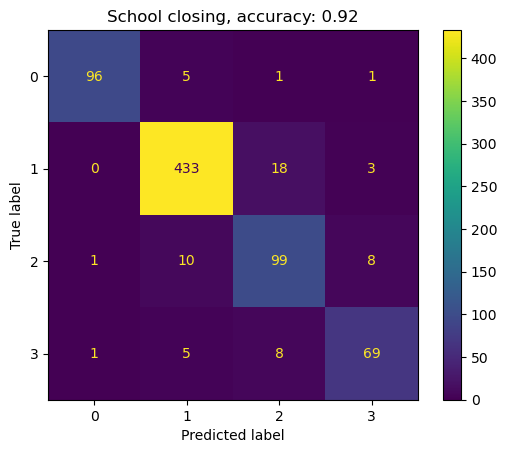

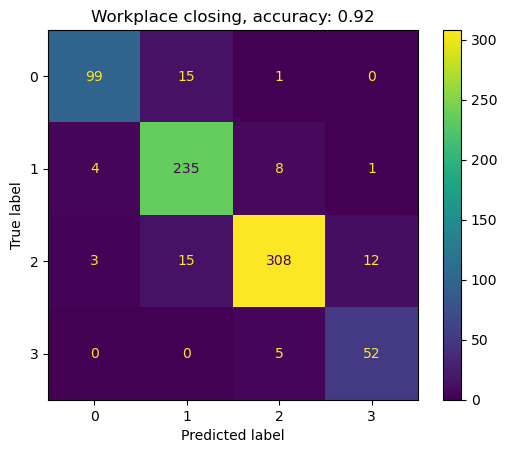

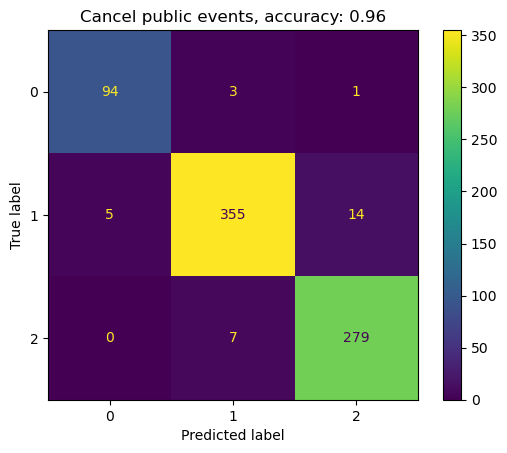

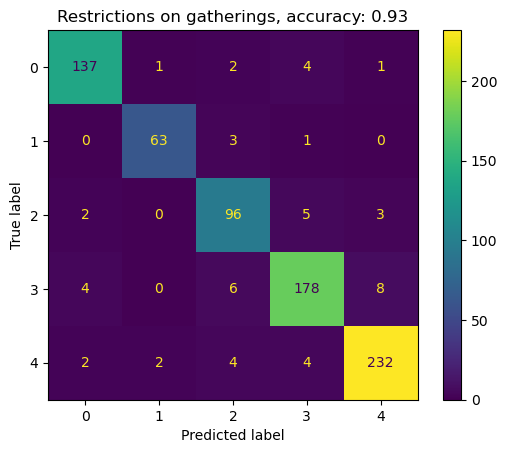

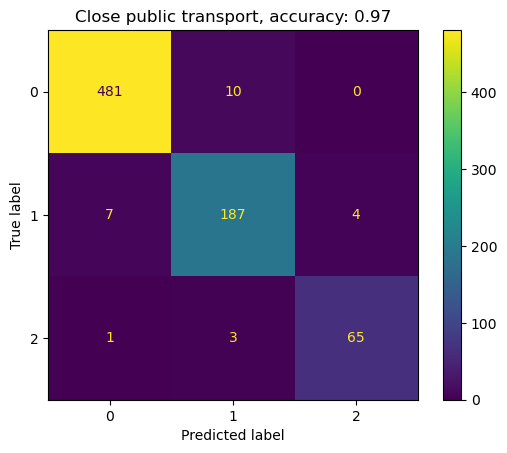

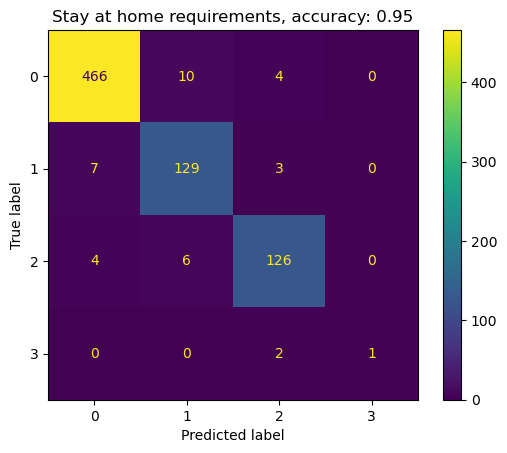

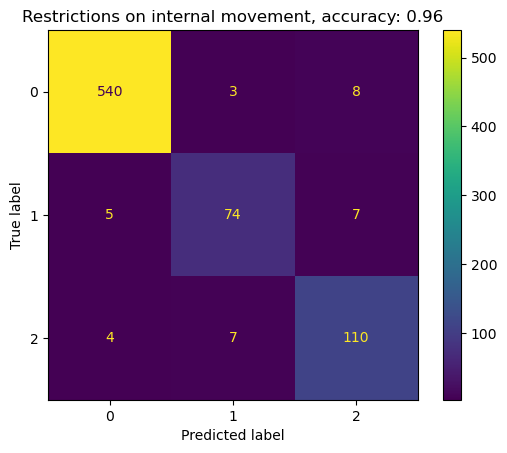

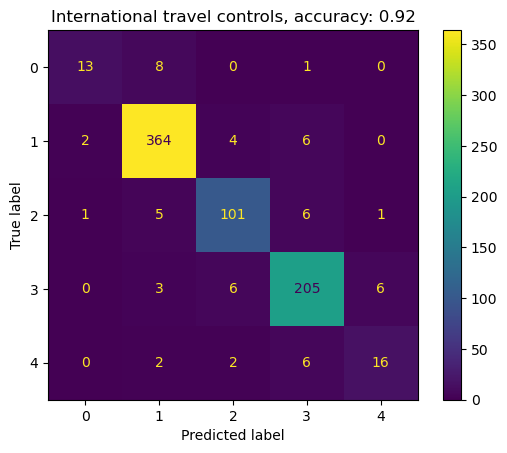

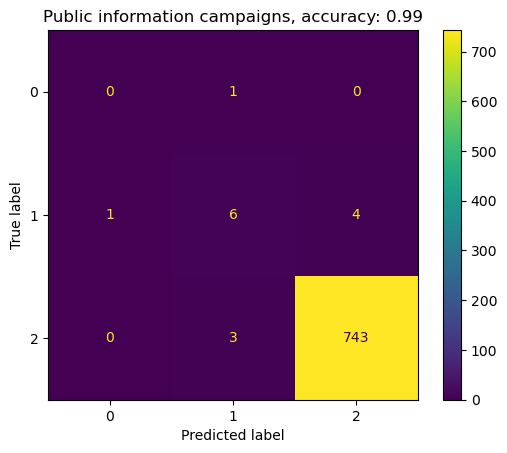

In [45]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

mtl_model = load_model("./models/mtl_model_europe.h5")

predictions = mtl_model.predict(
    x=test_samples.reshape(-1, num_features),
    batch_size=10,
    verbose=0)

predictions = np.array(predictions)

f = lambda x: np.argmax(x, axis=-1)
predictions = f(predictions)

for idx, pred in enumerate(predictions):
    cm = confusion_matrix(y_true=test_labels[idx], y_pred=pred)
    accuracy = accuracy_score(test_labels[idx], pred).round(2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(npi_labels[idx] + ", accuracy: %.2f" % accuracy)
    plt.show()

## Recursive predictions

In [46]:
df = df[df['CountryName'] == "Poland"]
df.head(10)

,CountryName,Date,StringencyIndex_Average,C1M,C2M,C3M,C4M,C5M,C6M,C7M,...,H1,C1M_prev,C2M_prev,C3M_prev,C4M_prev,C5M_prev,C6M_prev,C7M_prev,C8M_prev,H1_prev
12687,Poland,"February 27, 2020",11.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12688,Poland,"March 09, 2020",13.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12689,Poland,"March 10, 2020",25.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
12690,Poland,"March 12, 2020",41.67,3.0,0.0,2.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
12691,Poland,"March 14, 2020",49.07,3.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
12692,Poland,"March 15, 2020",57.41,3.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
12693,Poland,"March 31, 2020",81.48,3.0,2.0,2.0,4.0,0.0,2.0,2.0,...,2.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,2.0
12694,Poland,"April 09, 2020",87.04,3.0,2.0,2.0,4.0,1.0,2.0,2.0,...,2.0,3.0,2.0,2.0,4.0,0.0,2.0,2.0,4.0,2.0
12695,Poland,"April 20, 2020",83.33,3.0,2.0,2.0,4.0,1.0,1.0,2.0,...,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0
12696,Poland,"May 25, 2020",79.63,2.0,2.0,2.0,4.0,1.0,1.0,2.0,...,2.0,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0


In [47]:
def iterative_predict(init, indexes):
    f = lambda x: np.argmax(x, axis=-1)
    iterative_predictions = []

    for j in range(0, len(indexes)):
        predictions = mtl_model.predict(
            x=init.reshape(-1, num_features),
            batch_size=10,
            verbose=0)
        predictions = np.array(predictions)
        predictions = f(predictions)
        # print(indexes[j])
        # print(predictions.flatten())
        init = np.concatenate(([indexes[j]], predictions.flatten()))
        iterative_predictions.append(predictions.flatten())

    return list(zip(*iterative_predictions))

In [48]:
init = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

indexes = df['StringencyIndex_Average'].tolist()
indexes = np.divide(indexes, 100)
indexes_no_first = indexes[1:]

long_term_predictions = iterative_predict(init=init, indexes=indexes_no_first)

In [49]:
def two_step_plots(xlabel, ylabel, xvalue1, yvalue1, xvalue2, yvalue2, title, spacing, plot_si = True):
    fig, ax = plt.subplots()
    ax.step(xvalue1, yvalue1, label="prediction")
    ax.step(xvalue2, yvalue2, label="dataset")
    ax.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)  # Adjust the rotation angle as needed
    plt.xticks(range(0, len(xvalue1), spacing))  # Display every second label
    # plt.tight_layout()  # Optional: adjust layout to prevent label overlapping
    plt.show()

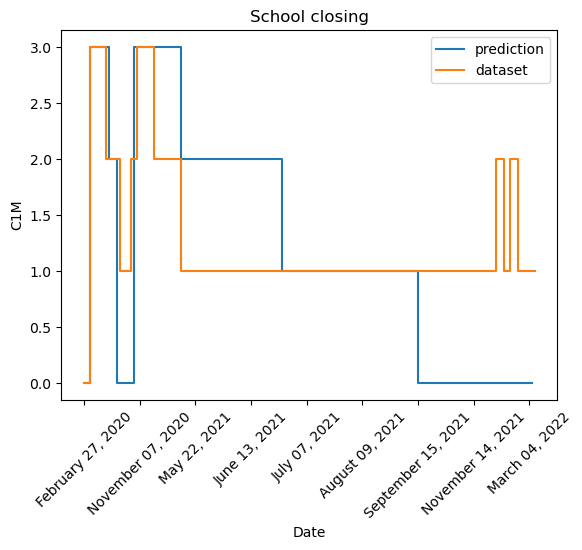

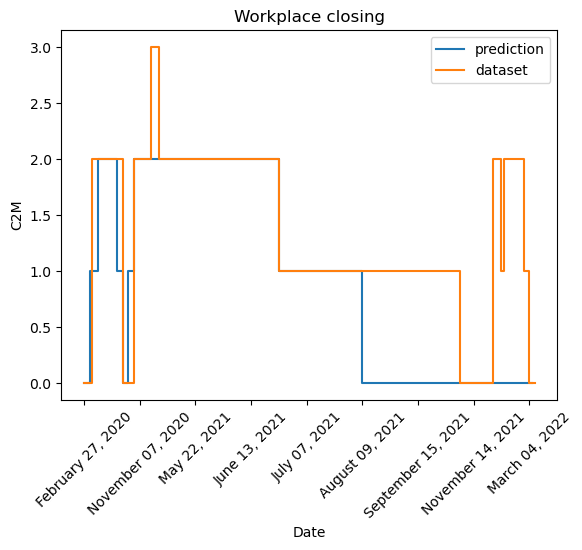

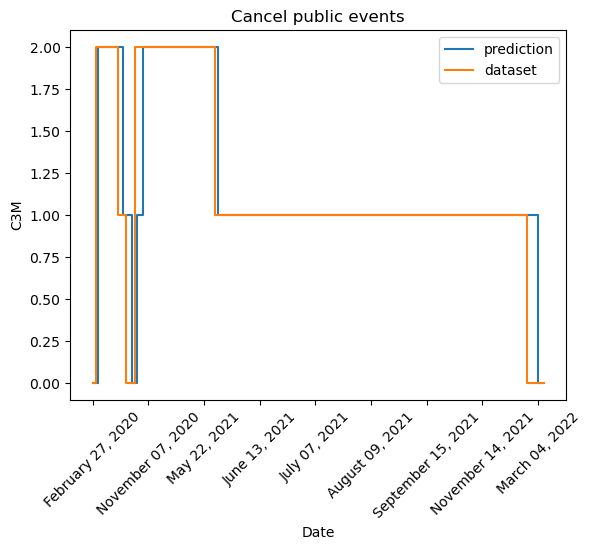

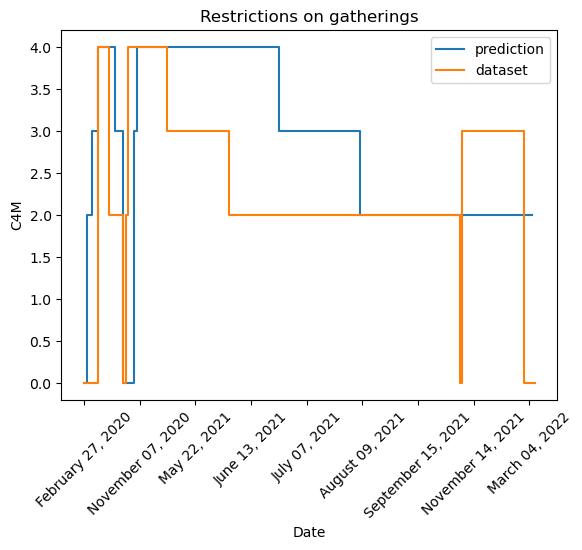

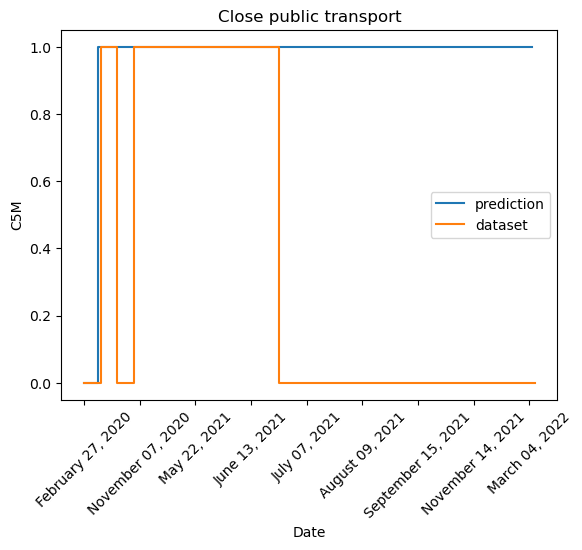

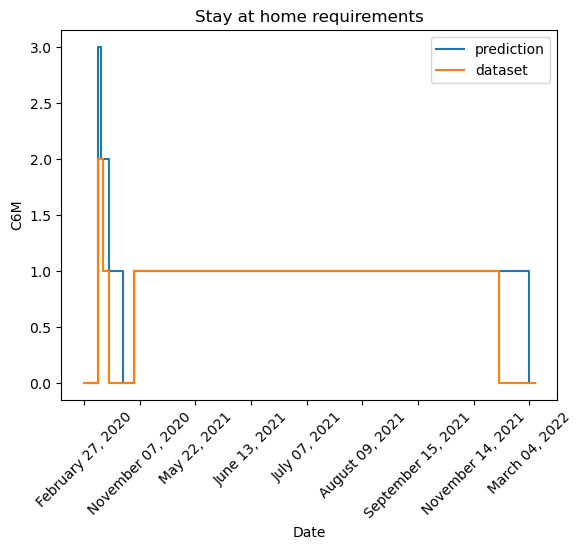

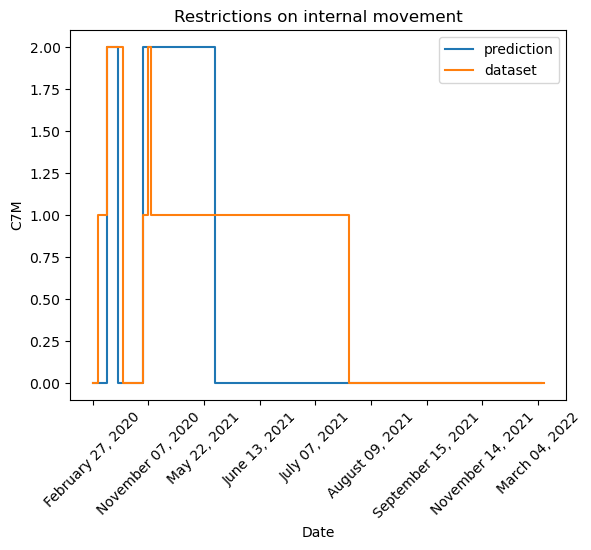

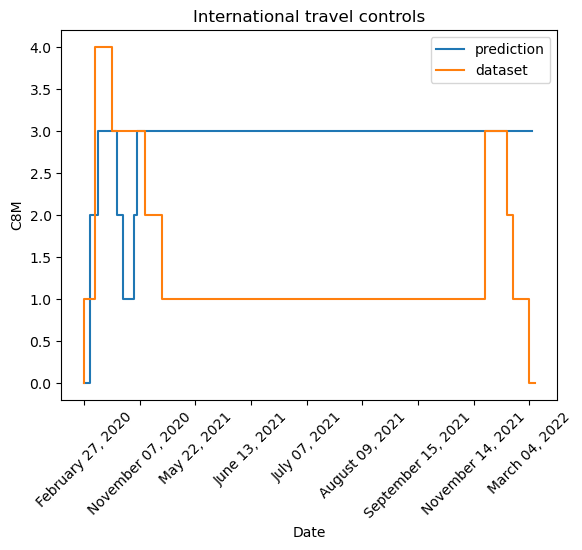

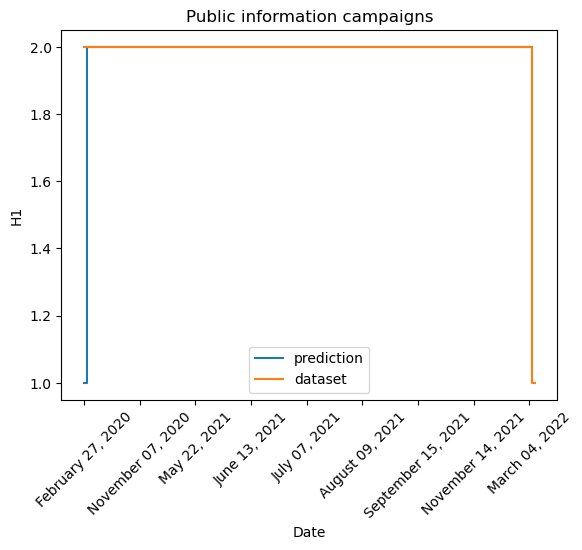

In [50]:
for i in range(0, 9):
    two_step_plots(xlabel='Date', ylabel=npis[i], xvalue1=range(len(long_term_predictions[i])),
              yvalue1=long_term_predictions[i], xvalue2=df['Date'],  yvalue2=df[npis[i]], title=npi_labels[i], spacing=20, plot_si=False)

### 4 Months Predictions

In [55]:
df_all_dates = load_dataset("./OxCGRT_data/OxCGRT_clean_alldates.csv")

In [56]:
df_poland_four_months = df_all_dates[df_all_dates['CountryName'] == "Poland"][:130]
df_poland_four_months.head(20)

,Continent,CountryName,Date,C1M,C1M_Flag,C2M,C2M_Flag,C3M,C3M_Flag,C4M,...,C7M_Flag,C8M,H1,H1_Flag,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,Prev_StringencyIndex_Average
135765,Europe,Poland,"January 23, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,0.00
135766,Europe,Poland,"January 24, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135767,Europe,Poland,"January 25, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135768,Europe,Poland,"January 26, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135769,Europe,Poland,"January 27, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135770,Europe,Poland,"January 28, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135771,Europe,Poland,"January 29, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135772,Europe,Poland,"January 30, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135773,Europe,Poland,"January 31, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56
135774,Europe,Poland,"February 01, 2020",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,NV,0.0,5.56,5.56


In [57]:
init = np.array([0.0556, 0, 0, 0, 0, 0, 0, 0, 0, 1])

indexes = df_poland_four_months['StringencyIndex_Average'].tolist()
indexes = np.divide(indexes, 100)
indexes_four_months = indexes[1:130]

six_months_predictions = iterative_predict(init=init, indexes=indexes_four_months)

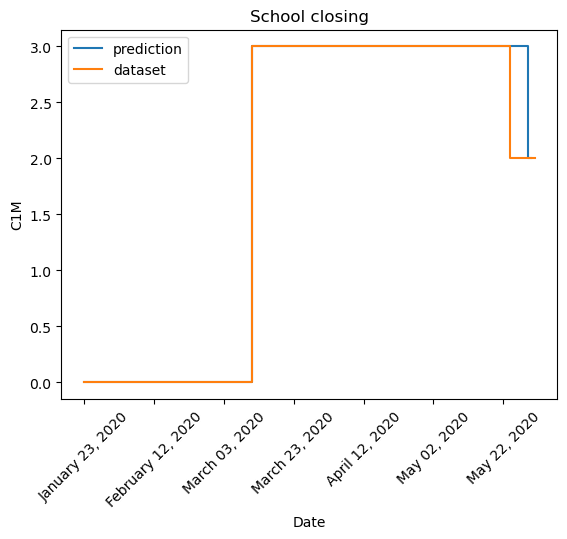

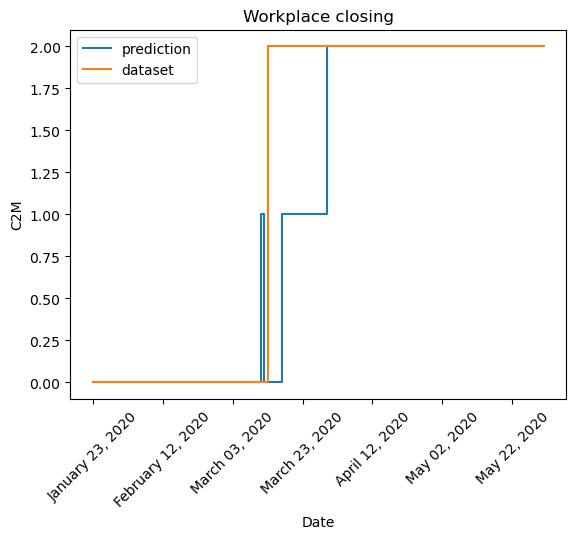

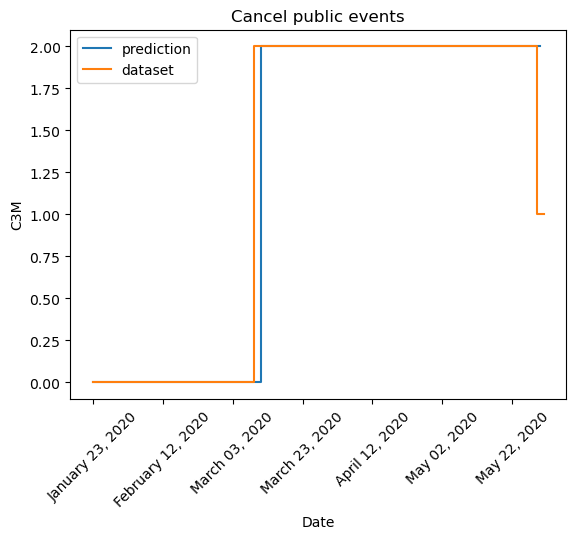

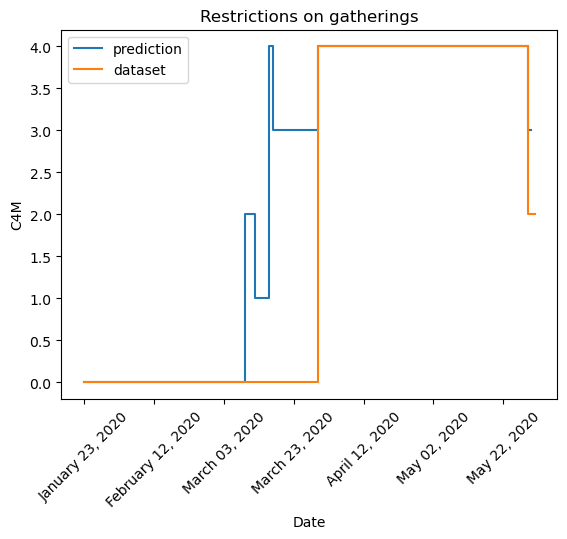

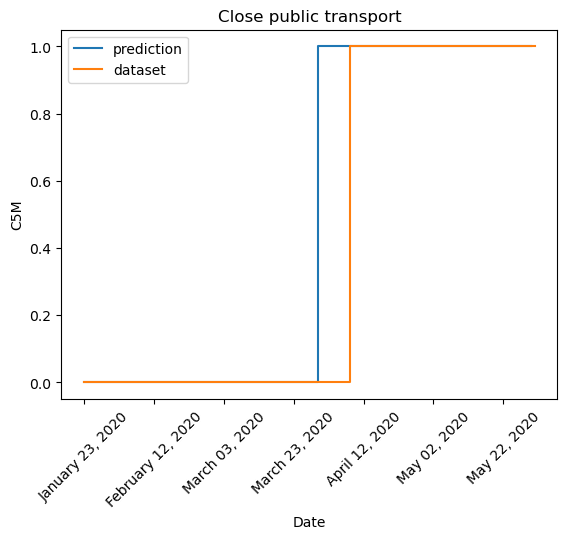

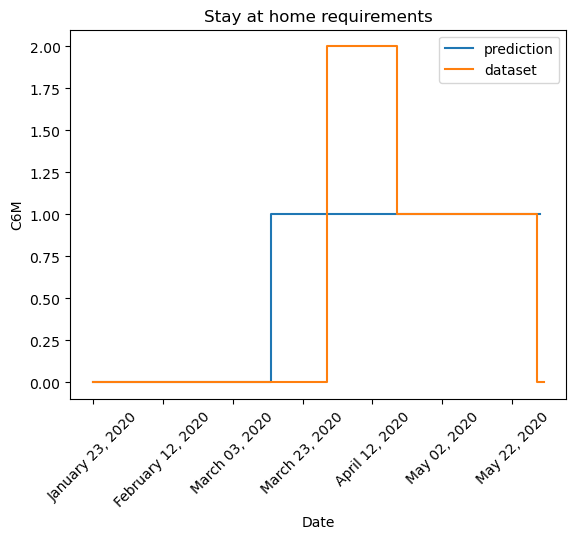

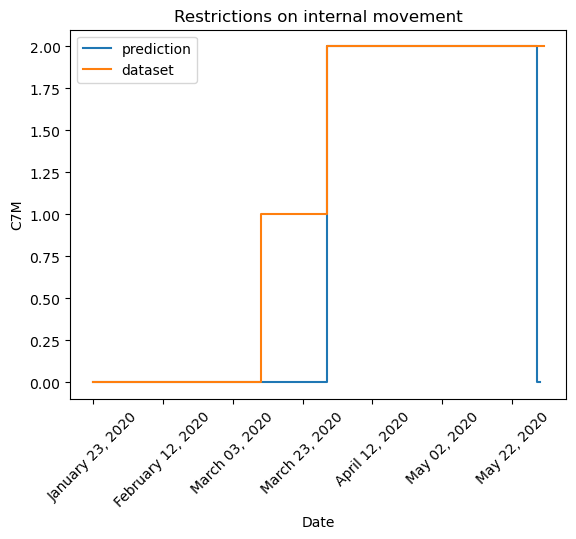

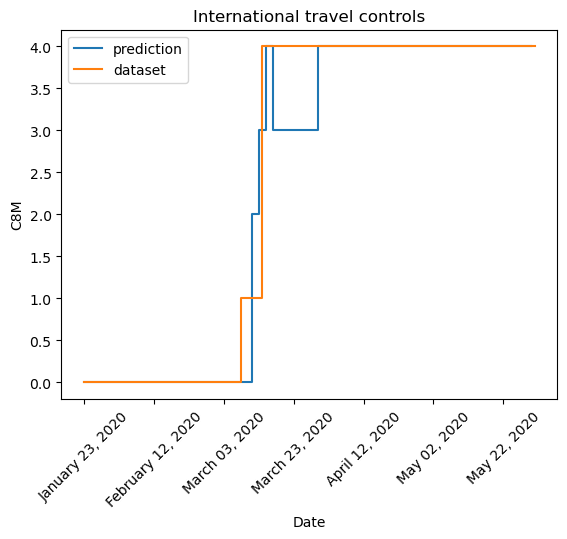

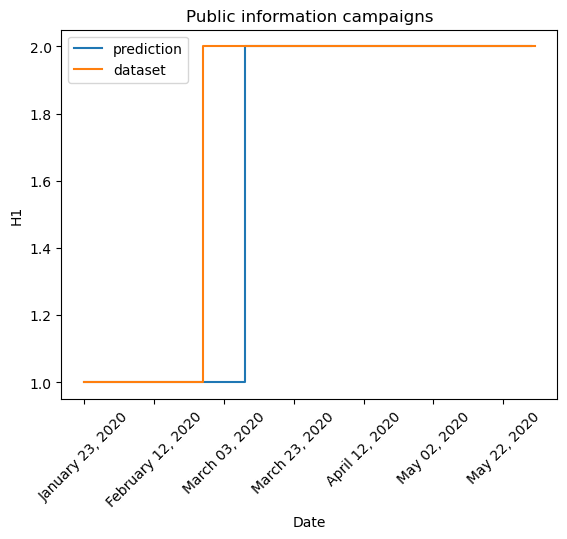

In [58]:
for i in range(0, 9):
    two_step_plots(xlabel='Date', ylabel=npis[i], xvalue1=range(len(six_months_predictions[i])),
              yvalue1=six_months_predictions[i], xvalue2=df_poland_four_months['Date'],  yvalue2=df_poland_four_months[npis[i]], title=npi_labels[i], spacing=20, plot_si=False)